# New DataFrame

## Data Cleaning

### Original Dataset

In [655]:
# Settings to allow all columns in dataframe to display
import pandas as pd
import numpy as np
import math
np.random.seed(2)

# Notebook display options
desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns',300)

In [203]:
# Import custom functions
import api
import data_cleaning as dc
import feature_engineering as fe
import train as tr

# Importing the most recent data
url = 'https://moneypuck.com/moneypuck/playerData/careers/gameByGame/all_teams.csv'
rawData = api.api_call(url)
print("** The raw data has been successfully downloaded.")

# Cleaning the rawData
cleanData = dc.clean(rawData)
print("** The raw data has been successfully cleaned.")

# Feature Engineering using the cleanData
df = fe.fengine(cleanData)
print("** Feature Engineering has been successfully completed.")

** The raw data has been successfully downloaded.
** The raw data has been successfully cleaned.
** Feature Engineering has been successfully completed.


In [204]:
df.head()

,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,year,month,day,home_or_away#,team#,opposingTeam#
3931,NYR,2018,NYR,2018020006,NYR,NSH,0,0,0,1,HOME,2018-10-04,Team Level,all,0.6160,0.4874,0.5341,3600.0,34.472,2.984,2.224,7.267,1.042,18.851,14.633,2.948,2.852,2.818,36.0,11.0,11.0,58.0,2.0,2.0,1.0,5.0,1.0,22.0,15.0,34.0,45.0,2.0,4.0,29.0,24.0,10.0,10.0,33.0,11.0,3.0,0.785,1.412,0.787,0.0,0.0,2.0,55.535,47.0,45.081,2.0,0.486,0.521,0.521,2.949,2.819,2.790,29.403,1.860,1.845,7.090,0.898,16.864,12.443,1.849,1.953,1.941,33.0,8.0,20.0,61.0,3.0,0.0,0.0,8.0,2.0,12.0,16.0,30.0,38.0,3.0,6.0,32.0,21.0,16.0,9.0,33.0,7.0,1.0,0.893,0.736,0.231,2.0,0.0,1.0,64.070,41.0,42.797,4.0,0.384,0.000,0.000,2.244,2.357,2.342,0,2018,10,4,1,19,17
3936,NYR,2018,NYR,2018020017,NYR,BUF,0,0,0,1,AWAY,2018-10-06,Team Level,all,0.5210,0.5397,0.5500,3600.0,38.416,3.506,2.534,8.314,1.252,23.311,16.083,3.082,3.505,3.080,44.0,11.0,13.0,68.0,1.0,3.0,1.0,12.0,1.0,21.0,17.0,43.0,54.0,7.0,17.0,37.0,18.0,2.0,4.0,42.0,9.0,4.0,1.089,0.911,1.506,0.0,0.0,1.0,66.264,55.0,53.994,2.0,0.606,1.232,1.232,2.881,2.879,2.828,31.020,3.224,2.194,6.727,0.995,18.767,13.093,3.201,3.222,3.199,29.0,16.0,13.0,58.0,3.0,0.0,0.0,6.0,1.0,16.0,19.0,26.0,42.0,5.0,13.0,34.0,18.0,5.0,6.0,33.0,9.0,3.0,0.842,1.043,1.339,0.0,2.0,1.0,59.726,45.0,46.105,3.0,0.483,0.000,0.000,3.707,3.706,3.677,0,2018,10,6,0,19,3
3941,NYR,2018,NYR,2018020029,NYR,CAR,0,0,0,1,AWAY,2018-10-07,Team Level,all,0.4291,0.4080,0.3646,3600.0,25.495,2.940,2.036,5.373,0.783,12.523,11.345,2.877,3.079,3.014,24.0,11.0,16.0,51.0,5.0,2.0,1.0,4.0,0.0,5.0,19.0,19.0,30.0,5.0,10.0,27.0,27.0,8.0,11.0,26.0,7.0,2.0,0.800,0.977,1.163,0.0,4.0,1.0,53.795,35.0,36.831,6.0,0.465,1.163,1.163,2.242,2.389,2.358,42.802,3.9

### Home Team Dataset

In [205]:
home_mask = df.home_or_away == 'HOME'
home_df = pd.DataFrame()
home_df = home_df.append(df.loc[home_mask])
home_df.head(10)

,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,year,month,day,home_or_away#,team#,opposingTeam#
3931,NYR,2018,NYR,2018020006,NYR,NSH,0,0,0,1,HOME,2018-10-04,Team Level,all,0.6160,0.4874,0.5341,3600.0,34.472,2.984,2.224,7.267,1.042,18.851,14.633,2.948,2.852,2.818,36.0,11.0,11.0,58.0,2.0,2.0,1.0,5.0,1.0,22.0,15.0,34.0,45.0,2.0,4.0,29.0,24.0,10.0,10.0,33.0,11.0,3.0,0.785,1.412,0.787,0.0,0.0,2.0,55.535,47.0,45.081,2.0,0.486,0.521,0.521,2.949,2.819,2.790,29.403,1.860,1.845,7.090,0.898,16.864,12.443,1.849,1.953,1.941,33.0,8.0,20.0,61.0,3.0,0.0,0.0,8.0,2.0,12.0,16.0,30.0,38.0,3.0,6.0,32.0,21.0,16.0,9.0,33.0,7.0,1.0,0.893,0.736,0.231,2.0,0.0,1.0,64.070,41.0,42.797,4.0,0.384,0.000,0.000,2.244,2.357,2.342,0,2018,10,4,1,19,17
3951,NYR,2018,NYR,2018020057,NYR,EDM,0,0,0,1,HOME,2018-10-13,Team Level,all,0.4856,0.4811,0.4805,3600.0,25.878,2.211,1.592,6.131,0.881,14.904,11.281,2.099,2.095,1.992,24.0,13.0,14.0,51.0,1.0,3.0,0.0,7.0,1.0,12.0,13.0,23.0,36.0,4.0,8.0,29.0,23.0,7.0,11.0,31.0,4.0,2.0,0.850,0.514,0.848,1.0,0.0,0.0,49.361,37.0,35.820,6.0,0.340,1.047,1.047,1.504,1.446,1.435,28.237,2.342,1.791,6.929,0.959,16.066,11.912,2.254,2.441,2.348,27.0,13.0,15.0,55.0,2.0,3.0,1.0,8.0,2.0,9.0,16.0,25.0,38.0,2.0,4.0,26.0,31.0,6.0,10.0,33.0,4.0,3.0,0.610,0.583,1.148,0.0,0.0,2.0,57.029,40.0,41.294,3.0,0.392,0.942,0.942,1.792,1.849,1.842,0,2018,10,13,1,19,11
3966,NYR,2018,NYR,2018020115,NYR,CGY,0,0,0,1,HOME,2018-10-21,Team Level,all,0.6969,0.6016,0.6196,3600.0,40.474,4.494,2.873,8.911,1.356,21.909,17.457,4.192,4.164,3.886,45.0,12.0,20.0,77.0,1.0,8.0,0.0,10.0,2.0,17.0,19.0,44.0,56.0,3.0,6.0,20.0,31.0,8.0,15.0,40.0,10.0,7.0,1.496,1.155,1.843,1.0,0.0,0.0,70.976,57.0,52.475,15.0,0.608,1.690,1.690,3.411,3.164,3.051,24.688,

### Away Team Dataset

In [206]:
away_mask = df.home_or_away == 'AWAY'
away_df = pd.DataFrame()
away_df = away_df.append(df.loc[away_mask])
away_df.head(10)

,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,year,month,day,home_or_away#,team#,opposingTeam#
3936,NYR,2018,NYR,2018020017,NYR,BUF,0,0,0,1,AWAY,2018-10-06,Team Level,all,0.5210,0.5397,0.5500,3600.0,38.416,3.506,2.534,8.314,1.252,23.311,16.083,3.082,3.505,3.080,44.0,11.0,13.0,68.0,1.0,3.0,1.0,12.0,1.0,21.0,17.0,43.0,54.0,7.0,17.0,37.0,18.0,2.0,4.0,42.0,9.0,4.0,1.089,0.911,1.506,0.0,0.0,1.0,66.264,55.0,53.994,2.0,0.606,1.232,1.232,2.881,2.879,2.828,31.020,3.224,2.194,6.727,0.995,18.767,13.093,3.201,3.222,3.199,29.0,16.0,13.0,58.0,3.0,0.0,0.0,6.0,1.0,16.0,19.0,26.0,42.0,5.0,13.0,34.0,18.0,5.0,6.0,33.0,9.0,3.0,0.842,1.043,1.339,0.0,2.0,1.0,59.726,45.0,46.105,3.0,0.483,0.000,0.000,3.707,3.706,3.677,0,2018,10,6,0,19,3
3941,NYR,2018,NYR,2018020029,NYR,CAR,0,0,0,1,AWAY,2018-10-07,Team Level,all,0.4291,0.4080,0.3646,3600.0,25.495,2.940,2.036,5.373,0.783,12.523,11.345,2.877,3.079,3.014,24.0,11.0,16.0,51.0,5.0,2.0,1.0,4.0,0.0,5.0,19.0,19.0,30.0,5.0,10.0,27.0,27.0,8.0,11.0,26.0,7.0,2.0,0.800,0.977,1.163,0.0,4.0,1.0,53.795,35.0,36.831,6.0,0.465,1.163,1.163,2.242,2.389,2.358,42.802,3.911,2.944,10.152,1.470,24.936,17.588,3.715,3.789,3.596,40.0,21.0,13.0,74.0,8.0,6.0,2.0,7.0,0.0,14.0,26.0,32.0,53.0,5.0,10.0,38.0,30.0,13.0,18.0,47.0,11.0,3.0,1.711,1.472,0.728,3.0,3.0,2.0,71.500,61.0,59.215,9.0,0.632,0.915,0.915,3.628,3.507,3.378,0,2018,10,7,0,19,4
3976,NYR,2018,NYR,2018020139,NYR,CHI,0,0,0,1,AWAY,2018-10-25,Team Level,all,0.3236,0.3853,0.3924,3600.0,21.705,1.878,1.762,5.367,0.820,12.352,8.822,1.857,1.933,1.911,19.0,12.0,11.0,42.0,1.0,3.0,1.0,3.0,0.0,13.0,11.0,18.0,30.0,4.0,11.0,31.0,20.0,1.0,3.0,21.0,9.0,1.0,0.544,1.003,0.330,0.0,0.0,1.0,41.873,31.0,30.897,2.0,0.373,0.615,0.615,1.636,1.673,1.667,33.917,3.

### Home & Away Joined Dataset

In [207]:
# join the two dataset together
master = (pd.merge(home_df, away_df, on= 'gameId'))

In [208]:
master.head()

,team_x,season_x,name_x,gameId,playerTeam_x,opposingTeam_x,Shootout Game_x,OT Game_x,Win_x,Loss_x,home_or_away_x,gameDate_x,position_x,situation_x,xGoalsPercentage_x,corsiPercentage_x,fenwickPercentage_x,iceTime_x,xOnGoalFor_x,xGoalsFor_x,xReboundsFor_x,xFreezeFor_x,xPlayStoppedFor_x,xPlayContinuedInZoneFor_x,xPlayContinuedOutsideZoneFor_x,flurryAdjustedxGoalsFor_x,scoreVenueAdjustedxGoalsFor_x,flurryScoreVenueAdjustedxGoalsFor_x,shotsOnGoalFor_x,missedShotsFor_x,blockedShotAttemptsFor_x,shotAttemptsFor_x,goalsFor_x,reboundsFor_x,reboundGoalsFor_x,freezeFor_x,playStoppedFor_x,playContinuedInZoneFor_x,playContinuedOutsideZoneFor_x,savedShotsOnGoalFor_x,savedUnblockedShotAttemptsFor_x,penaltiesFor_x,penalityMinutesFor_x,faceOffsWonFor_x,hitsFor_x,takeawaysFor_x,giveawaysFor_x,lowDangerShotsFor_x,mediumDangerShotsFor_x,highDangerShotsFor_x,lowDangerxGoalsFor_x,mediumDangerxGoalsFor_x,highDangerxGoalsFor_x,lowDangerGoalsFor_x,mediumDangerGoalsFor_x,highDangerGoalsFor_x,scoreAdjustedShotsAttemptsFor_x,unblockedShotAttemptsFor_x,scoreAdjustedUnblockedShotAttemptsFor_x,dZoneGiveawaysFor_x,xGoalsFromxReboundsOfShotsFor_x,xGoalsFromActualReboundsOfShotsFor_x,reboundxGoalsFor_x,totalShotCreditFor_x,scoreAdjustedTotalShotCreditFor_x,scoreFlurryAdjustedTotalShotCreditFor_x,xOnGoalAgainst_x,xGoalsAgainst_x,xReboundsAgainst_x,xFreezeAgainst_x,xPlayStoppedAgainst_x,xPlayContinuedInZoneAgainst_x,xPlayContinuedOutsideZoneAgainst_x,flurryAdjustedxGoalsAgainst_x,scoreVenueAdjustedxGoalsAgainst_x,flurryScoreVenueAdjustedxGoalsAgainst_x,shotsOnGoalAgainst_x,missedShotsAgainst_x,blockedShotAttemptsAgainst_x,shotAttemptsAgainst_x,goalsAgainst_x,reboundsAgainst_x,reboundGoalsAgainst_x,freezeAgainst_x,playStoppedAgainst_x,playContinuedInZoneAgainst_x,playContinuedOutsideZoneAgainst_x,savedShotsOnGoalAgainst_x,savedUnblockedShotAttemptsAgainst_x,penaltiesAgainst_x,penalityMinutesAgainst_x,faceOffsWonAgainst_x,hitsAgainst_x,takeawaysAgainst_x,giveawaysAgainst_x,lowDangerShotsAgainst_x,mediumDangerShotsAgainst_x,highDangerShotsAgainst_x,lowDangerxGoalsAgainst_x,mediumDangerxGoalsAgainst_x,highDangerxGoalsAgainst_x,lowDangerGoalsAgainst_x,mediumDangerGoalsAgainst_x,highDangerGoalsAgainst_x,scoreAdjustedShotsAttemptsAgainst_x,unblockedShotAttemptsAgainst_x,scoreAdjustedUnblockedShotAttemptsAgainst_x,dZoneGiveawaysAgainst_x,xGoalsFromxReboundsOfShotsAgainst_x,xGoalsFromActualReboundsOfShotsAgainst_x,reboundxGoalsAgainst_x,totalShotCreditAgainst_x,scoreAdjustedTotalShotCreditAgainst_x,scoreFlurryAdjustedTotalShotCreditAgainst_x,playoffGame_x,year_x,month_x,day_x,home_or_away#_x,team#_x,opposingTeam#_x,team_y,season_y,name_y,playerTeam_y,opposingTeam_y,Shootout Game_y,OT Game_y,Win_y,Loss_y,home_or_away_y,gameDate_y,position_y,situation_y,xGoalsPercentage_y,corsiPercentage_y,fenwickPercentage_y,iceTime_y,xOnGoalFor_y,xGoalsFor_y,xReboundsFor_y,xFreezeFor_y,xPlayStoppedFor_y,xPlayContinuedInZoneFor_y,xPlayContinuedOutsideZoneFor_y,flurryAdjustedxGoalsFor_y,scoreVenueAdjustedxGoalsFor_y,flurryScoreVenueAdjustedxGoalsFor_y,shotsOnGoalFor_y,missedShotsFor_y,blockedShotAttemptsFor_y,shotAttemptsFor_y,goalsFor_y,reboundsFor_y,reboundGoalsFor_y,freezeFor_y,playStoppedFor_y,playContinuedInZoneFor_y,playContinuedOutsideZoneFor_y,savedShotsOnGoalFor_y,savedUnblockedShotAttemptsFor_y,penaltiesFor_y,penalityMinutesFor_y,faceOffsWonFor_y,hitsFor_y,takeawaysFor_y,giveawaysFor_y,lowDangerShotsFor_y,mediumDangerShotsFor_y,highDangerShotsFor_y,lowDangerxGoalsFor_y,mediumDangerxGoalsFor_y,highDangerxGoalsFor_y,lowDangerGoalsFor_y,mediumDangerGoalsFor_y,highDangerGoalsFor_y,scoreAdjustedShotsAttemptsFor_y,unblockedShotAttemptsFor_y,scoreAdjustedUnblockedShotAttemptsFor_y,dZoneGiveawaysFor_y,xGoalsFromxReboundsOfShotsFor_y,xGoalsFromActualReboundsOfShotsFor_y,reboundxGoalsFor_y,totalShotCreditFor_y,scoreAdjustedTotalShotCreditFor_y,scoreFlurryAdjustedTotalShotCreditFor_y,xOnGoalAgainst_y,xGoalsAgainst_y,xReboundsAgainst_y,xFreezeAgainst_y,xPlayStoppedAgainst_y,xPlayContinuedInZo

In [209]:
#categorical data
categorical_cols = ['team_x', 'opposingTeam_x'] 

#import pandas as pd
master = pd.get_dummies(master, columns = categorical_cols)

In [210]:
master.head()

,season_x,name_x,gameId,playerTeam_x,Shootout Game_x,OT Game_x,Win_x,Loss_x,home_or_away_x,gameDate_x,position_x,situation_x,xGoalsPercentage_x,corsiPercentage_x,fenwickPercentage_x,iceTime_x,xOnGoalFor_x,xGoalsFor_x,xReboundsFor_x,xFreezeFor_x,xPlayStoppedFor_x,xPlayContinuedInZoneFor_x,xPlayContinuedOutsideZoneFor_x,flurryAdjustedxGoalsFor_x,scoreVenueAdjustedxGoalsFor_x,flurryScoreVenueAdjustedxGoalsFor_x,shotsOnGoalFor_x,missedShotsFor_x,blockedShotAttemptsFor_x,shotAttemptsFor_x,goalsFor_x,reboundsFor_x,reboundGoalsFor_x,freezeFor_x,playStoppedFor_x,playContinuedInZoneFor_x,playContinuedOutsideZoneFor_x,savedShotsOnGoalFor_x,savedUnblockedShotAttemptsFor_x,penaltiesFor_x,penalityMinutesFor_x,faceOffsWonFor_x,hitsFor_x,takeawaysFor_x,giveawaysFor_x,lowDangerShotsFor_x,mediumDangerShotsFor_x,highDangerShotsFor_x,lowDangerxGoalsFor_x,mediumDangerxGoalsFor_x,highDangerxGoalsFor_x,lowDangerGoalsFor_x,mediumDangerGoalsFor_x,highDangerGoalsFor_x,scoreAdjustedShotsAttemptsFor_x,unblockedShotAttemptsFor_x,scoreAdjustedUnblockedShotAttemptsFor_x,dZoneGiveawaysFor_x,xGoalsFromxReboundsOfShotsFor_x,xGoalsFromActualReboundsOfShotsFor_x,reboundxGoalsFor_x,totalShotCreditFor_x,scoreAdjustedTotalShotCreditFor_x,scoreFlurryAdjustedTotalShotCreditFor_x,xOnGoalAgainst_x,xGoalsAgainst_x,xReboundsAgainst_x,xFreezeAgainst_x,xPlayStoppedAgainst_x,xPlayContinuedInZoneAgainst_x,xPlayContinuedOutsideZoneAgainst_x,flurryAdjustedxGoalsAgainst_x,scoreVenueAdjustedxGoalsAgainst_x,flurryScoreVenueAdjustedxGoalsAgainst_x,shotsOnGoalAgainst_x,missedShotsAgainst_x,blockedShotAttemptsAgainst_x,shotAttemptsAgainst_x,goalsAgainst_x,reboundsAgainst_x,reboundGoalsAgainst_x,freezeAgainst_x,playStoppedAgainst_x,playContinuedInZoneAgainst_x,playContinuedOutsideZoneAgainst_x,savedShotsOnGoalAgainst_x,savedUnblockedShotAttemptsAgainst_x,penaltiesAgainst_x,penalityMinutesAgainst_x,faceOffsWonAgainst_x,hitsAgainst_x,takeawaysAgainst_x,giveawaysAgainst_x,lowDangerShotsAgainst_x,mediumDangerShotsAgainst_x,highDangerShotsAgainst_x,lowDangerxGoalsAgainst_x,mediumDangerxGoalsAgainst_x,highDangerxGoalsAgainst_x,lowDangerGoalsAgainst_x,mediumDangerGoalsAgainst_x,highDangerGoalsAgainst_x,scoreAdjustedShotsAttemptsAgainst_x,unblockedShotAttemptsAgainst_x,scoreAdjustedUnblockedShotAttemptsAgainst_x,dZoneGiveawaysAgainst_x,xGoalsFromxReboundsOfShotsAgainst_x,xGoalsFromActualReboundsOfShotsAgainst_x,reboundxGoalsAgainst_x,totalShotCreditAgainst_x,scoreAdjustedTotalShotCreditAgainst_x,scoreFlurryAdjustedTotalShotCreditAgainst_x,playoffGame_x,year_x,month_x,day_x,home_or_away#_x,team#_x,opposingTeam#_x,team_y,season_y,name_y,playerTeam_y,opposingTeam_y,Shootout Game_y,OT Game_y,Win_y,Loss_y,home_or_away_y,gameDate_y,position_y,situation_y,xGoalsPercentage_y,corsiPercentage_y,fenwickPercentage_y,iceTime_y,xOnGoalFor_y,xGoalsFor_y,xReboundsFor_y,xFreezeFor_y,xPlayStoppedFor_y,xPlayContinuedInZoneFor_y,xPlayContinuedOutsideZoneFor_y,flurryAdjustedxGoalsFor_y,scoreVenueAdjustedxGoalsFor_y,flurryScoreVenueAdjustedxGoalsFor_y,shotsOnGoalFor_y,missedShotsFor_y,blockedShotAttemptsFor_y,shotAttemptsFor_y,...,freezeFor_y,playStoppedFor_y,playContinuedInZoneFor_y,playContinuedOutsideZoneFor_y,savedShotsOnGoalFor_y,savedUnblockedShotAttemptsFor_y,penaltiesFor_y,penalityMinutesFor_y,faceOffsWonFor_y,hitsFor_y,takeawaysFor_y,giveawaysFor_y,lowDangerShotsFor_y,mediumDangerShotsFor_y,highDangerShotsFor_y,lowDangerxGoalsFor_y,mediumDangerxGoalsFor_y,highDangerxGoalsFor_y,lowDangerGoalsFor_y,mediumDangerGoalsFor_y,highDangerGoalsFor_y,scoreAdjustedShotsAttemptsFor_y,unblockedShotAttemptsFor_y,scoreAdjustedUnblockedShotAttemptsFor_y,dZoneGiveawaysFor_y,xGoalsFromxReboundsOfShotsFor_y,xGoalsFromActualReboundsOfShotsFor_y,reboundxGoalsFor_y,totalShotCreditFor_y,scoreAdjustedTotalShotCreditFor_y,scoreFlurryAdjustedTotalShotCreditFor_y,xOnGoalAgainst_y,xGoalsAgainst_y,xReboundsAgainst_y,xFreezeAgainst_y,xPlayStoppedAgainst_y,xPlayContinuedInZoneAgainst_y,xPlayContinuedOutsideZoneAgainst_y,flurryAdjusted

### Sliced DF for Machine Learning

In [328]:
final = master[['team_x_ANA',
 'team_x_ARI',
 'team_x_BOS',
 'team_x_BUF',
 'team_x_CAR',
 'team_x_CBJ',
 'team_x_CGY',
 'team_x_CHI',
 'team_x_COL',
 'team_x_DAL',
 'team_x_DET',
 'team_x_EDM',
 'team_x_FLA',
 'team_x_LAK',
 'team_x_MIN',
 'team_x_MTL',
 'team_x_NJD',
 'team_x_NSH',
 'team_x_NYI',
 'team_x_NYR',
 'team_x_OTT',
 'team_x_PHI',
 'team_x_PIT',
 'team_x_SEA',
 'team_x_SJS',
 'team_x_STL',
 'team_x_TBL',
 'team_x_TOR',
 'team_x_VAN',
 'team_x_VGK',
 'team_x_WPG',
 'team_x_WSH',
 'opposingTeam_x_ANA',
 'opposingTeam_x_ARI',
 'opposingTeam_x_BOS',
 'opposingTeam_x_BUF',
 'opposingTeam_x_CAR',
 'opposingTeam_x_CBJ',
 'opposingTeam_x_CGY',
 'opposingTeam_x_CHI',
 'opposingTeam_x_COL',
 'opposingTeam_x_DAL',
 'opposingTeam_x_DET',
 'opposingTeam_x_EDM',
 'opposingTeam_x_FLA',
 'opposingTeam_x_LAK',
 'opposingTeam_x_MIN',
 'opposingTeam_x_MTL',
 'opposingTeam_x_NJD',
 'opposingTeam_x_NSH',
 'opposingTeam_x_NYI',
 'opposingTeam_x_NYR',
 'opposingTeam_x_OTT',
 'opposingTeam_x_PHI',
 'opposingTeam_x_PIT',
 'opposingTeam_x_SEA',
 'opposingTeam_x_SJS',
 'opposingTeam_x_STL',
 'opposingTeam_x_TBL',
 'opposingTeam_x_TOR',
 'opposingTeam_x_VAN',
 'opposingTeam_x_VGK',
 'opposingTeam_x_WPG',
 'opposingTeam_x_WSH',
 'Win_x', 'corsiPercentage_x', 'corsiPercentage_y', 'fenwickPercentage_x', 'fenwickPercentage_y'
 ]]

In [329]:
final.head()

,team_x_ANA,team_x_ARI,team_x_BOS,team_x_BUF,team_x_CAR,team_x_CBJ,team_x_CGY,team_x_CHI,team_x_COL,team_x_DAL,team_x_DET,team_x_EDM,team_x_FLA,team_x_LAK,team_x_MIN,team_x_MTL,team_x_NJD,team_x_NSH,team_x_NYI,team_x_NYR,team_x_OTT,team_x_PHI,team_x_PIT,team_x_SEA,team_x_SJS,team_x_STL,team_x_TBL,team_x_TOR,team_x_VAN,team_x_VGK,team_x_WPG,team_x_WSH,opposingTeam_x_ANA,opposingTeam_x_ARI,opposingTeam_x_BOS,opposingTeam_x_BUF,opposingTeam_x_CAR,opposingTeam_x_CBJ,opposingTeam_x_CGY,opposingTeam_x_CHI,opposingTeam_x_COL,opposingTeam_x_DAL,opposingTeam_x_DET,opposingTeam_x_EDM,opposingTeam_x_FLA,opposingTeam_x_LAK,opposingTeam_x_MIN,opposingTeam_x_MTL,opposingTeam_x_NJD,opposingTeam_x_NSH,opposingTeam_x_NYI,opposingTeam_x_NYR,opposingTeam_x_OTT,opposingTeam_x_PHI,opposingTeam_x_PIT,opposingTeam_x_SEA,opposingTeam_x_SJS,opposingTeam_x_STL,opposingTeam_x_TBL,opposingTeam_x_TOR,opposingTeam_x_VAN,opposingTeam_x_VGK,opposingTeam_x_WPG,opposingTeam_x_WSH,Win_x,corsiPercentage_x,corsiPercentage_y,fenwickPercentage_x,fenwickPercentage_y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4874,0.5126,0.5341,0.4659
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4811,0.5189,0.4805,0.5195
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.6016,0.3984,0.6196,0.3804
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.4286,0.5714,0.4026,0.5974
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.3739,0.6261,0.3820,0.6180


In [330]:
# Normalize
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

final.iloc[:, 65:] = scalar.fit_transform(final.iloc[:, 65:].to_numpy())

/opt/anaconda3/envs/NN/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [331]:
final.head()

,team_x_ANA,team_x_ARI,team_x_BOS,team_x_BUF,team_x_CAR,team_x_CBJ,team_x_CGY,team_x_CHI,team_x_COL,team_x_DAL,team_x_DET,team_x_EDM,team_x_FLA,team_x_LAK,team_x_MIN,team_x_MTL,team_x_NJD,team_x_NSH,team_x_NYI,team_x_NYR,team_x_OTT,team_x_PHI,team_x_PIT,team_x_SEA,team_x_SJS,team_x_STL,team_x_TBL,team_x_TOR,team_x_VAN,team_x_VGK,team_x_WPG,team_x_WSH,opposingTeam_x_ANA,opposingTeam_x_ARI,opposingTeam_x_BOS,opposingTeam_x_BUF,opposingTeam_x_CAR,opposingTeam_x_CBJ,opposingTeam_x_CGY,opposingTeam_x_CHI,opposingTeam_x_COL,opposingTeam_x_DAL,opposingTeam_x_DET,opposingTeam_x_EDM,opposingTeam_x_FLA,opposingTeam_x_LAK,opposingTeam_x_MIN,opposingTeam_x_MTL,opposingTeam_x_NJD,opposingTeam_x_NSH,opposingTeam_x_NYI,opposingTeam_x_NYR,opposingTeam_x_OTT,opposingTeam_x_PHI,opposingTeam_x_PIT,opposingTeam_x_SEA,opposingTeam_x_SJS,opposingTeam_x_STL,opposingTeam_x_TBL,opposingTeam_x_TOR,opposingTeam_x_VAN,opposingTeam_x_VGK,opposingTeam_x_WPG,opposingTeam_x_WSH,Win_x,corsiPercentage_x,corsiPercentage_y,fenwickPercentage_x,fenwickPercentage_y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.314255,0.314250,0.262182,-0.262187
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.394897,0.394893,-0.408183,0.408176
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.147546,-1.147552,1.331514,-1.331518
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.066916,1.066912,-1.382463,1.382455
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.767096,1.767092,-1.640103,1.640095


In [332]:
final.shape

(3619, 69)

## Machine Learning

In [333]:
# Separate features and labels for models
features = final.drop(labels = "Win_x", axis = 1)
labels = final["Win_x"]

In [334]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 10)

### Logistic Classification

In [335]:
# Train a LinearRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lm = LogisticRegression(random_state = 19, max_iter=2000, solver = 'liblinear')
#lm.fit(X_train.values,y_train)
lm.fit(X_train, y_train)
print("** Logistic Regression model has been trained.")
    
# Get the train and test accuracy scores
print(f"** Training Score: {lm.score(X_train, y_train)}")
print(f"** Testing Score: {lm.score(X_test, y_test)}")

# Get the train and test logloss results
print(f"** Training LogLoss: {log_loss(y_train, lm.predict_proba(X_train))}")
print(f"** Testing LogLoss: {log_loss(y_test, lm.predict_proba(X_test))}")

** Logistic Regression model has been trained.
** Training Score: 0.690846286701209
** Testing Score: 0.6795580110497238
** Training LogLoss: 0.5803957742694043
** Testing LogLoss: 0.5894982976285701


### Random Forest

In [219]:
# Import libraries 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initializing a DataFrame to save each model results
rf_results = pd.DataFrame()

# Loop to use different parameters in the model
for f in np.arange(2,68,2):
    for e in np.arange(10,200,20):
        # Create Random Forest model
        clf = RandomForestClassifier(max_features = f,
                                    random_state = 0,
                                    n_estimators = e)
        
        # Fit and train the model using the training data
        clf.fit(X_train, y_train.values.ravel())
        
        # Scoring the models results
        #cScore = clf2.score(df_test_att, df_test_label)
        
        # Score the model based on 'cv' folds
        clfScores = cross_val_score(clf, X_train, y_train.values.ravel(), cv = 5)
        
        # Print average scores and +/- two standard deviations away (covering 95% of scores)
        print("max_features: %i, num_estimators: %i, Accuracy: %0.3f (+/- %0.3f)" % (f, e, clfScores.mean(), clfScores.std() * 2))
        
        # New row for results dataframe containing model hyperparameters and results
        new_row = {'max_features': f,
                   'num_estimators': e,
                   'accuracy': clfScores.mean()}
        rf_results = rf_results.append(new_row, ignore_index = True)

max_features: 2, num_estimators: 10, Accuracy: 0.558 (+/- 0.025)
max_features: 2, num_estimators: 30, Accuracy: 0.576 (+/- 0.018)
max_features: 2, num_estimators: 50, Accuracy: 0.574 (+/- 0.026)
max_features: 2, num_estimators: 70, Accuracy: 0.579 (+/- 0.023)
max_features: 2, num_estimators: 90, Accuracy: 0.573 (+/- 0.025)
max_features: 2, num_estimators: 110, Accuracy: 0.574 (+/- 0.029)
max_features: 2, num_estimators: 130, Accuracy: 0.576 (+/- 0.031)
max_features: 2, num_estimators: 150, Accuracy: 0.574 (+/- 0.028)
max_features: 2, num_estimators: 170, Accuracy: 0.572 (+/- 0.033)
max_features: 2, num_estimators: 190, Accuracy: 0.575 (+/- 0.023)
max_features: 4, num_estimators: 10, Accuracy: 0.569 (+/- 0.048)
max_features: 4, num_estimators: 30, Accuracy: 0.582 (+/- 0.050)
max_features: 4, num_estimators: 50, Accuracy: 0.582 (+/- 0.041)
max_features: 4, num_estimators: 70, Accuracy: 0.586 (+/- 0.040)
max_features: 4, num_estimators: 90, Accuracy: 0.586 (+/- 0.031)
max_features: 4, num

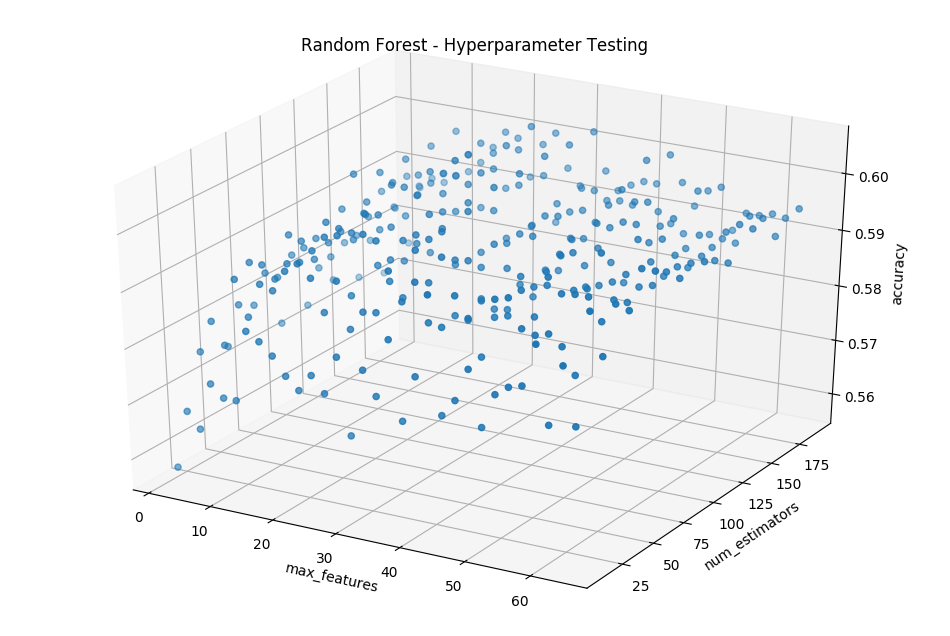

In [220]:
import re
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Data for a three-dimensional scattered points
x = rf_results['max_features'].tolist()
y = rf_results['num_estimators'].tolist()     # test removing .tolist() on all three lines
z = rf_results['accuracy'].tolist()

# Creating figure
fig = plt.figure(figsize= (12,8))
ax = plt.axes(projection = "3d")

# Creating plot
ax.scatter3D(x, y, z, cmap = 'Greens')
plt.title("Random Forest - Hyperparameter Testing")
ax.set_xlabel('max_features')
ax.set_ylabel('num_estimators')
ax.set_zlabel('accuracy')

#Show the plot
plt.show()

In [221]:
# Sort results DataFrame
rf_results.sort_values(by = 'accuracy', ascending = False)

,accuracy,max_features,num_estimators
125,0.604850,26.0,110.0
128,0.603815,26.0,170.0
127,0.602773,26.0,150.0
157,0.602088,32.0,150.0
158,0.601748,32.0,170.0
...,...,...,...
40,0.572377,10.0,10.0
140,0.570303,30.0,10.0
10,0.568583,4.0,10.0
20,0.565811,6.0,10.0


### Neural Networks

In [336]:
# Import libraries
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, SimpleRNN

In [337]:
# Finding the shape for input_dim
print(f"The shape of the dataset: {X_train.shape}")
dims = X_train.shape[1]
print(f'Dimensions:{dims}')

The shape of the dataset: (2895, 68)
Dimensions:68


In [563]:
# Building a multilayer neural network using Keras
model = Sequential()
model.add(Dense(68, input_dim = dims, activation = 'softmax'))
#model.add(SimpleRNN(68, activation = 'relu'))
#model.add(Dropout(.20))
model.add(Dense(34, activation = 'softmax'))
#model.add(Dense(1, activation = "softmax"))

In [564]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 68)                4692      
_________________________________________________________________
dense_92 (Dense)             (None, 34)                2346      
Total params: 7,038
Trainable params: 7,038
Non-trainable params: 0
_________________________________________________________________


In [565]:
optimizer = tf.keras.optimizers.Nadam(0.001)
# optimizer = tf.keras.optimizers.Adadelta(1.) # BEST!!!

In [566]:
# Compile the model to provide the training parameters
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [568]:
# Train the model
epoch = 300
history = model.fit(X_train, y_train, epochs = epoch, verbose = 1, validation_split = 0.15)

Train on 2460 samples, validate on 435 samples
Epoch 1/300
2460/2460 [==============================] - 0s 197us/sample - loss: 3.3857 - accuracy: 0.4138 - val_loss: 3.2346 - val_accuracy: 0.4667
Epoch 2/300
2460/2460 [==============================] - 0s 42us/sample - loss: 3.0877 - accuracy: 0.5126 - val_loss: 2.9355 - val_accuracy: 0.5540
Epoch 3/300
2460/2460 [==============================] - 0s 45us/sample - loss: 2.7890 - accuracy: 0.5382 - val_loss: 2.6358 - val_accuracy: 0.5678
Epoch 4/300
2460/2460 [==============================] - 0s 42us/sample - loss: 2.4909 - accuracy: 0.5520 - val_loss: 2.3375 - val_accuracy: 0.5563
Epoch 5/300
2460/2460 [==============================] - 0s 41us/sample - loss: 2.1969 - accuracy: 0.5585 - val_loss: 2.0470 - val_accuracy: 0.5517
Epoch 6/300
2460/2460 [==============================] - 0s 33us/sample - loss: 1.9160 - accuracy: 0.5610 - val_loss: 1.7762 - val_accuracy: 0.5517
Epoch 7/300
2460/2460 [==============================] - 0s 34us

In [577]:
# Evaluate the trained model
model_eval = model.evaluate(X_train, y_train)
print(f"The accuracy of the model is: {model_eval[1]}")
print(f"The loss of the model is: {round(model_eval[0], 4)}")

2895/2895 [==============================] - 0s 41us/sample - loss: 0.4372 - accuracy: 0.8114
The accuracy of the model is: 0.811398983001709
The loss of the model is: 0.4372


In [570]:
from sklearn.metrics import accuracy_score
y_test_pred = model.predict_classes(X_test)

print(accuracy_score(y_test, y_test_pred))

0.6588397790055248


In [571]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [637]:
val = history.history['val_loss']
loss = history.history['loss']

In [642]:
avgval = sum(history.history['loss']) / len(history.history['loss'])

In [643]:
avgval

0.6078234545300157

In [654]:
print(history.params)

{'batch_size': 32, 'epochs': 300, 'steps': 77, 'samples': 2460, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}


In [574]:
print(dir(history))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chief_worker_only', '_keras_api_names', '_keras_api_names_v1', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']


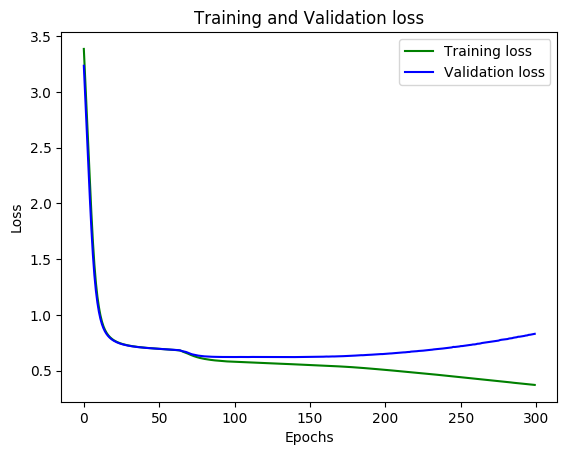

In [575]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0, epoch)
plt.plot(epochs, loss_train, 'g', label = 'Training loss')
plt.plot(epochs, loss_val, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

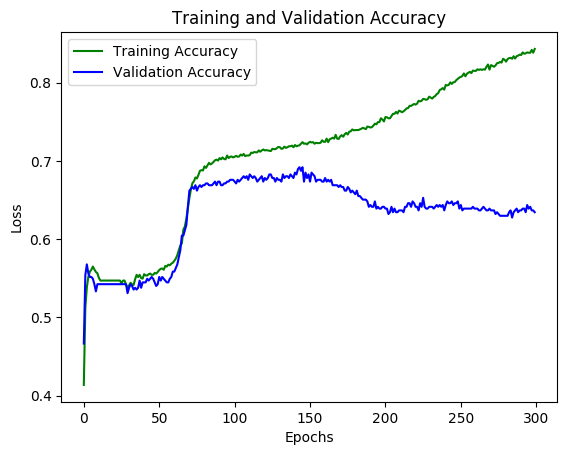

In [576]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0, epoch)
plt.plot(epochs, loss_train, 'g', label = 'Training Accuracy')
plt.plot(epochs, loss_val, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Loop - Neural Network

In [626]:
def select_optimizer(optimize, learn):
    """Used to select an optimizer and learning rate. """
    optimizer_dict = {'Adam': tf.optimizers.Adam(learning_rate = learn),
                      'SGD': tf.optimizers.SGD(learning_rate = learn),
                      'Adadelta': tf.optimizers.Adadelta(learning_rate = learn),
                      'RMSprop': tf.optimizers.RMSprop(learning_rate = learn),
                      'Adagrad': tf.optimizers.Adagrad(learning_rate = learn),
                      'Adamax': tf.optimizers.Adamax(learning_rate = learn),
                      'Nadam': tf.optimizers.Nadam(learning_rate = learn),
                      'Ftrl': tf.optimizers.Ftrl(learning_rate = learn),
                      }
    x = optimizer_dict[optimize]
    return x

In [629]:
# List of optimizers and learning rates to be looped through
list_optimizers = ['Adam', 'SGD', 'Adadelta', 'RMSprop', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

# Number of epochs per model
nn_epochs = 100

# Validation Split
val_split = 0.15

# Initializing a DataFrame to save each model results
nn_results = pd.DataFrame()

# Loop
for opt in list_optimizers:
    for lr in learning_rates:
        
        # Building a multilayer neural network using Keras
        model = Sequential()
        model.add(Dense(68, input_dim = dims, activation = 'relu'))
        model.add(Dense(34, activation = 'softmax'))
        
        # Compile the model to provide the training parameters
        model.compile(optimizer = select_optimizer(opt, lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
        
        # Train the model
        nn_history = model.fit(X_train, y_train, epochs = nn_epochs, verbose = 1, validation_split = val_split)
        
        # Evaluate the trained model
        nn_eval = model.evaluate(X_train, y_train)
        
        # Preicting using the testing data
        y_test_pred = model.predict_classes(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        
        # New row for results dataframe containing model hyperparameters and results
        new_row = {'epochs': nn_epochs,
                   'validation_split': val_split,
                   'training accuracy': nn_eval[1],
                   'training loss': nn_eval[0],
                   'testing accuracy': test_accuracy,
                   'optimizer': str(opt),
                   'learning_rate': lr
                   }
        nn_results = nn_results.append(new_row, ignore_index = True)

Train on 2460 samples, validate on 435 samples
Epoch 1/100
2460/2460 [==============================] - 0s 151us/sample - loss: 3.5694 - accuracy: 0.0146 - val_loss: 3.4758 - val_accuracy: 0.0322
Epoch 2/100
2460/2460 [==============================] - 0s 50us/sample - loss: 3.3692 - accuracy: 0.1220 - val_loss: 3.2758 - val_accuracy: 0.2023
Epoch 3/100
2460/2460 [==============================] - 0s 59us/sample - loss: 3.1689 - accuracy: 0.3467 - val_loss: 3.0716 - val_accuracy: 0.4897
Epoch 4/100
2460/2460 [==============================] - 0s 42us/sample - loss: 2.9617 - accuracy: 0.5102 - val_loss: 2.8575 - val_accuracy: 0.5241
Epoch 5/100
2460/2460 [==============================] - 0s 41us/sample - loss: 2.7441 - accuracy: 0.5285 - val_loss: 2.6343 - val_accuracy: 0.5264
Epoch 6/100
2460/2460 [==============================] - 0s 46us/sample - loss: 2.5185 - accuracy: 0.5333 - val_loss: 2.4049 - val_accuracy: 0.5310
Epoch 7/100
2460/2460 [==============================] - 0s 46us

In [631]:
nn_results.head(50)

,epochs,learning_rate,loss,optimizer,testing accuracy,training accuracy,validation_split
0,100.0,0.0001,0.564879,Adam,0.678177,0.709154,0.15
1,100.0,0.0010,0.386847,Adam,0.633978,0.837651,0.15
2,100.0,0.0100,0.528608,Adam,0.595304,0.892228,0.15
3,100.0,0.1000,0.805166,Adam,0.631215,0.748187,0.15
4,100.0,1.0000,0.722055,Adam,0.571823,0.547841,0.15
5,100.0,0.0001,2.585864,SGD,0.558011,0.564767,0.15
6,100.0,0.0010,0.692104,SGD,0.650552,0.629706,0.15
7,100.0,0.0100,0.575305,SGD,0.668508,0.702245,0.15
8,100.0,0.1000,0.482840,SGD,0.636740,0.780656,0.15
9,100.0,1.0000,0.399955,SGD,0.627072,0.867357,0.15


In [608]:
print(nn_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [618]:
a = select_optimizer('SGD', 1)

1


In [619]:
print(a)

In [620]:
# Compile the model to provide the training parameters
model.compile(optimizer = a, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])